## What are the most demanded skills for the top 3 most popular data roles?

Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [33]:
#importing libraries 

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [60]:
country = 'France'
df_country = df[df['job_country']== country ].copy()

In [61]:
df_skills = df_country.explode('job_skills')

In [62]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

In [63]:
df_skills_count = df_skills_count.reset_index(name = 'skill_count')



In [64]:
df_skills_count.sort_values(by='skill_count',ascending=False, inplace=True)

In [65]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

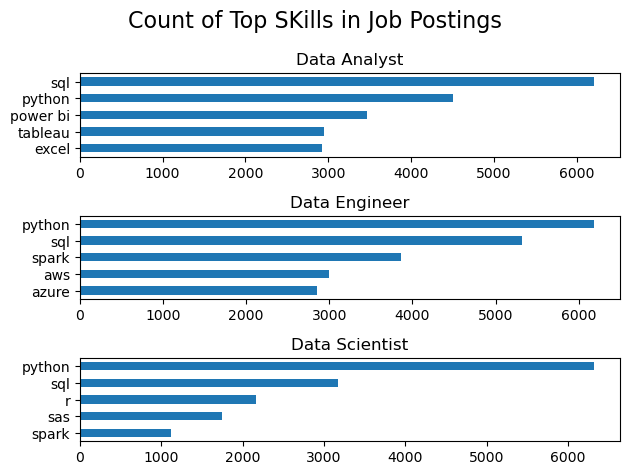

In [66]:
fig , ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
     df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
     df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
     ax[i].invert_yaxis()
     ax[i].set_ylabel('')
     ax[i].legend().set_visible(False)

fig.suptitle('Count of Top SKills in Job Postings', fontsize=16)
fig.tight_layout()
plt.show()


In [67]:
df_job_title_count = df_country['job_title_short'].value_counts().reset_index(name='jobs_total')

In [68]:
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,13803
1,Data Engineer,10936
2,Data Scientist,9497
3,Software Engineer,1203
4,Senior Data Engineer,1186
5,Senior Data Scientist,1029
6,Senior Data Analyst,804
7,Business Analyst,738
8,Machine Learning Engineer,388
9,Cloud Engineer,338


In [69]:
df_skills_percent = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

In [70]:
df_skills_percent['skill_percent'] = df_skills_percent['skill_count'] / df_skills_percent['jobs_total'] * 100

In [71]:
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,6320,9497,66.547331
1,sql,Data Analyst,6213,13803,45.011954
2,python,Data Engineer,6188,10936,56.583760
3,sql,Data Engineer,5319,10936,48.637527
4,python,Data Analyst,4506,13803,32.645077
...,...,...,...,...,...
1469,drupal,Cloud Engineer,1,338,0.295858
1470,solidity,Senior Data Engineer,1,1186,0.084317
1471,solidity,Data Scientist,1,9497,0.010530
1472,electron,Business Analyst,1,738,0.135501


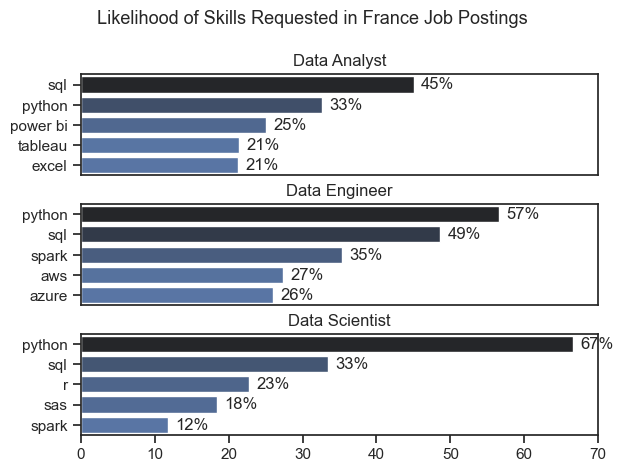

In [102]:
fig , ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
     df_plot = df_skills_percent[df_skills_percent['job_title_short']==job_title].head(5)
     #df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
     sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
     ax[i].set_title(job_title)
     ax[i].set_ylabel('')
     ax[i].set_xlabel('')
     ax[i].get_legend().remove()
     ax[i].set_xlim(0,70)

     for n,v in enumerate(df_plot['skill_percent']):
          ax[i].text(v + 1, n , f'{v:.0f}%',va='center')
     
     if i != len(job_titles)-1:
          ax[i].set_xticks([])



fig.suptitle(f'Likelihood of Skills Requested in {country} Job Postings', fontsize=13)
fig.tight_layout(h_pad=0.5)
plt.show()